In [1]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import math


In [2]:
def search_closets_thruple(sorted_distances):
    """
     search through value-distances until 3 close values are found 
    :param sorted_distances: A list of index pairs and the difference in function value of the associated index pair 
    :return a set of 3 indices corresponding to the three points most similar in value 
    """
    pairs, codons  = [], []
    for pair in sorted_distances:
        current_pair = [int(pair[0]), int(pair[1])]
        if current_pair[0] in pairs:
            return current_pair[0], current_pair[1], codons[pairs.index(int(current_pair[0]))]
        if current_pair[1] in pairs:        
            return current_pair[0], current_pair[1], codons[pairs.index(int(current_pair[1]))]

        pairs.append(current_pair[0])
        pairs.append(current_pair[1])
        codons.append(current_pair[1])
        codons.append(current_pair[0])
    


In [3]:
def get_sorted_distances(points):
    """
    calculate all value distances (axis 4) between all points and then sort them in ascending order. 
    The first n points are the n most similar points. 
    : param points: array of grid points x,y,z value, followed by function value
    : return distance_array: list containing index pairs of two  points i,j followed by their coresponding distances 
    : return indices: contains list of all indices of entries in distances_array, sorted in the order from smallest distance to largest
    """
    distance_array = []
    for i in range(0,points.shape[0]):
        for j in range(i+1,points.shape[0]):
            distance_array.append([i,j,np.abs((points[i,3]-points[j,3])/(max(points[i,3],points[j,3])))])
    indices = np.argsort(np.asarray(distance_array)[:,2])
    return  distance_array , indices

In [4]:
def get_plane_circle(a,n):
    # get a circle on the surface sphere by rotating one of the vectors of the 3  tuple around the axis of the longitudinal
    circle = np.zeros((3,20))
    i = 0
    for beta in np.linspace(0,2*np.pi,20):
        rot = rotation_matrix_arbitrary_axis(n,beta)
        circle[:,i] = rot@a
        i+=1
    return circle 

In [5]:
def find_thruple(a,b,c,rot_mat):
    for i in range(0,4):
        if i == 0:
            pass
        elif i == 1:
            a = -a
        elif i == 2:
            b = -b
        elif i == 3:
            c = -c
            
        n = np.cross(a-c,b-a)
        n = n/np.linalg.norm(n)
        n_zn = np.cross(n,np.asarray([0,0,1]))
        alpha = np.arccos(np.dot(n,np.asarray([0,0,1]))/(np.linalg.norm(n)))
        
        #  Test Normal Vector
        
        # has to be orthogonal to plane
        print(f"n x (a-c)   : {n@(a-c)/(np.linalg.norm(a-c))}")
        
        # has no be identical to z-vector rotated by the random rotation we want to counteract 
        print(f"normalvector: {n/np.linalg.norm(n)}")
        print(f"rotmat@z    : {rot_mat@np.asarray([0,0,1])}")
        
        # show angle of rotation for convenience
        print(f"alpha       : {alpha}")
        
        # evaluate rotated function on circle 
        circle = get_plane_circle(a,n)
        col_3 = np.empty((0))
        for point in circle.T:
            # print(np.linalg.norm(point), point)
            col_3 = np.append(col_3,np.abs((rot_mat@np.array((0,0,1)))@point))
        circle = np.vstack((circle,col_3))
        circle = circle.T
        
        # check if circle is fine 
        print(longitudinal[0], longitudinal[1], longitudinal[2])
        print(circle[3], circle[10], circle[-1])
        print(sum(circle[:,3])/circle.shape[0])

        if math.isclose(sum(circle[:,3])/circle.shape[0],(longitudinal[0,3]+longitudinal[1,3]+longitudinal[2,3])/3, rel_tol = 1e-2):
            return rotation_matrix_arbitrary_axis(n_zn, alpha)
        
        if i == 0:
            pass
        elif i == 1:
            a = -a
        elif i == 2:
            b = -b
        elif i == 3:
            c = -c


In [6]:

def rotation_matrix_arbitrary_axis(axis, angle):
    """
    Returns a 3D rotation matrix for rotating around an arbitrary axis by a given angle (in radians).
    
    :param axis: A 3D unit vector representing the axis of rotation (array-like or list).
    :param angle: The angle in radians by which to rotate.
    :return: A 3x3 rotation matrix.
    """
    axis = np.array(axis)
    axis = axis / np.linalg.norm(axis)  # Ensure the axis is a unit vector
    
    cos_theta = np.cos(angle)
    sin_theta = np.sin(angle)
    one_minus_cos = 1 - cos_theta
    
    # Skew-symmetric matrix of the axis
    K = np.array([
        [0, -axis[2], axis[1]],
        [axis[2], 0, -axis[0]],
        [-axis[1], axis[0], 0]
    ])
    
    # Outer product of the axis
    outer_product = np.outer(axis, axis)
    
    # Rotation matrix using Rodrigues' formula
    R = cos_theta * np.eye(3) + one_minus_cos * outer_product + sin_theta * K
    
    return R

def rotate_vector_arbitrary_axis(vector, axis, angle):
    """
    Rotates a 3D vector around an arbitrary axis by a given angle (in radians).
    
    :param vector: A 3D vector to rotate (as a list or numpy array).
    :param axis: A 3D unit vector representing the axis of rotation.
    :param angle: The angle in radians by which to rotate the vector.
    :return: The rotated 3D vector.
    """
    rot_matrix = rotation_matrix_arbitrary_axis(axis, angle)
    rotated_vector = np.dot(rot_matrix, vector)
    return rotated_vector

In [7]:
# create random rotation for function
import random

r_axis = np.asarray([np.float32(random.uniform(0,1)), np.float32(random.uniform(0,1)), np.float32(random.uniform(0,1))])
r_angle = random.uniform(0,2*np.pi)
rot_mat = rotation_matrix_arbitrary_axis(r_axis, r_angle)

### Examples

In [8]:

print(r_axis, r_angle)
# pretty: [0.30823973 0.17037524 0.06697026] 1.5707963267948966
# horrific example with mirror plane 
# r_axis, r_angle =   np.asarray([0.63047713, 0.05455516, 0.3520908 ]), 1.5707963267948966
#, optically the second one needs to be inverted
#second horrific but very educational example:
# r_axis, r_angle = np.asarray([0.66095924, 0.3604531,  0.2651065 ]),  1.5707963267948966

[0.52944195 0.85591674 0.7515755 ] 2.9475187674214784


In [9]:
# Create test grid, a wedge, an eighth of the sphere, on which function will be evaluated. also add the nonrotated function.
cm = plt.get_cmap("RdYlGn")

res = 25

# Make data
phis = np.linspace(1e-1, np.pi/2-1e-1, res)
thetas = np.linspace(1e-1, np.pi/2-1e-1, res)
x,y,z,ref = np.empty((0)), np.empty((0)),np.empty((0)), np.empty((0))

for phi in phis:
    for theta in thetas:
        x =  np.append(x,np.cos(phi)*np.sin(theta))
        y =  np.append(y,np.sin(phi)*np.sin(theta))
        z =  np.append(z,np.cos(theta))
        ref = np.append(ref,abs(np.cos(theta)))

# rotate and stack the points
points = np.vstack((np.vstack((x,y)),z))

ref_grid = np.vstack((points,ref))

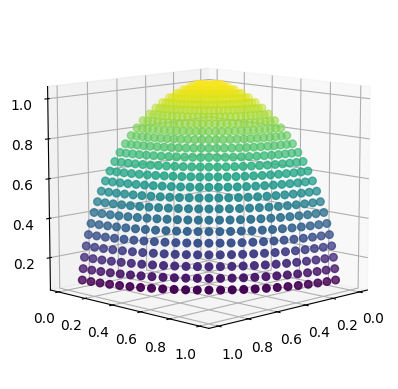

In [10]:

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(ref_grid[0,:], ref_grid[1,:], ref_grid[2,:], s=30, c=ref_grid[3,:], marker='o')                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show() 

In [11]:
col = np.empty((0))
for point in points.T:
        col = np.append(col,np.abs((rot_mat@np.array((0,0,1)))@point))
        # np.append(col,np.abs( point[2]))

# now stack
grid = np.vstack((points,col))



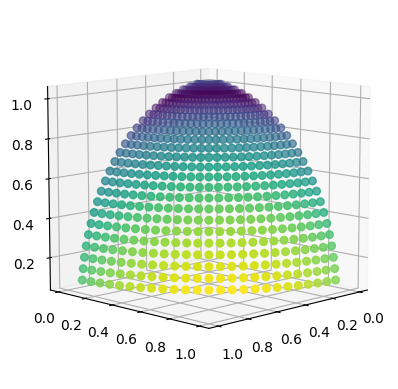

In [12]:

# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
p3d = ax3D.scatter(grid[0,:], grid[1,:], grid[2,:], s=30, c=grid[3,:], marker='o')                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)


plt.show() 

In [13]:
# for i,similar in enumerate(similar_points):
#     print(i, similar)
dists, indices = get_sorted_distances(grid.T)
sorted_distances = np.asarray(dists)[indices,:]


In [14]:
thruple = search_closets_thruple(sorted_distances)
print(sorted_distances.shape)
print(thruple)

(195000, 3)
(44, 389, 190)


In [15]:
longitudinal = []
for i in thruple:
    longitudinal.append(grid.T[i,:])

longitudinal = np.asarray(longitudinal)

In [16]:
# construct normal vector of 3-tuple of closest point, assuming they are part of one longitudinal
a = longitudinal[0,:-1]
b = longitudinal[1,:-1]
c = longitudinal[2,:-1]

rot_mat_2 = find_thruple(a,b,c,rot_mat)

n x (a-c)   : -9.271030844181535e-17
normalvector: [ 0.63118098  0.72646514 -0.27177008]
rotmat@z    : [ 0.63108424  0.72649436 -0.2719164 ]
alpha       : 1.8460281875735158
[0.91516641 0.14498272 0.376099   0.58060874] [0.45120612 0.64004288 0.62189882 0.58063212] [0.71733977 0.39171276 0.5761812  0.58060581]
[ 0.92833695 -0.13651025 -0.34576793  0.58070487] [-0.22602617  0.77503669 -0.59011041  0.58087893] [0.91516641 0.14498272 0.376099   0.58060874]
0.5807410641216297


In [17]:
resulting_points = rot_mat_2@points[:,:]

print(rot_mat@rot_mat_2)

col_2 = np.empty((0))
for resulting_point in resulting_points.T:
        col_2 = np.append(col_2,np.abs( resulting_point[2]))

resulting_grid = np.vstack((resulting_points,col))
resulting_grid = np.vstack((resulting_grid,col_2))


[[-0.17231198  0.97954737 -0.10390134]
 [ 0.80714926  0.07994361 -0.58490931]
 [-0.56464025 -0.18465092 -0.80441613]]


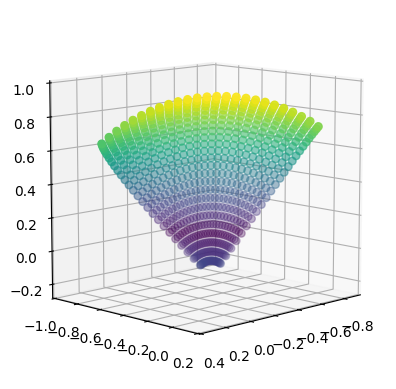

In [18]:
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_axisbelow(True)
p3d = ax3D.scatter(resulting_grid[0,:], resulting_grid[1,:], resulting_grid[2,:], s=30, c=resulting_grid[3,:], marker='o',zorder=-99)                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show()  

This is the result of the algorithm. If the orientation of the rotation has been found, the wedge is rotated in such a way that the longitudinals, i.e. the colorfull bands apper where we initially saw them in our reference figure, the first image of this notebook.

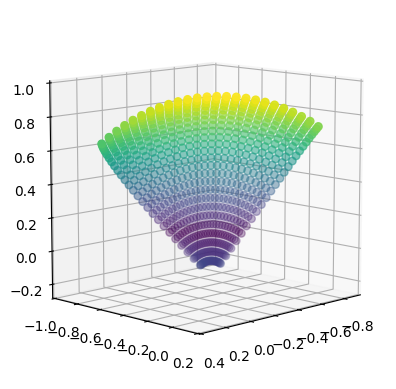

In [19]:
# 3D Plot
fig = plt.figure()
ax3D = fig.add_subplot(111, projection='3d')
ax3D.set_axisbelow(True)
p3d = ax3D.scatter(resulting_grid[0,:], resulting_grid[1,:], resulting_grid[2,:], s=30, c=resulting_grid[4,:], marker='o',zorder=-99)                                                                                
ax3D.set_aspect('equal')
ax3D.view_init(elev=10., azim=45)

plt.show()  

This image is just here to be compare to the previous image. it is the same set of coordinates, but instead of keeping the function values we had evaluated before, i.e. the values of the rotated function, we now just calculate exactly the $z$ value. If the algorithm worked this figure and the preceding figure are the same.